# Importing stuff

In [3]:

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 
  
import warnings 
warnings.filterwarnings("ignore") 

Check if CUDA available

In [68]:
print("yep" if tf.config.list_physical_devices('GPU') else "nope")

yep


load the data

In [16]:
data = pd.read_csv('./all_stocks_5yr.csv') 
print(data.shape) 
print(data.head()) 

(619040, 7)
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


converting data to time series data


In [18]:

data['date'] = pd.to_datetime(data['date']) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [49]:
companies = data['Name'].unique().tolist()
companies

['AAL',
 'AAPL',
 'AAP',
 'ABBV',
 'ABC',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'ADS',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALLE',
 'ALL',
 'ALXN',
 'AMAT',
 'AMD',
 'AME',
 'AMGN',
 'AMG',
 'AMP',
 'AMT',
 'AMZN',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APC',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ARNC',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AYI',
 'AZO',
 'A',
 'BAC',
 'BAX',
 'BA',
 'BBT',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BHF',
 'BHGE',
 'BIIB',
 'BK',
 'BLK',
 'BLL',
 'BMY',
 'BRK.B',
 'BSX',
 'BWA',
 'BXP',
 'CAG',
 'CAH',
 'CAT',
 'CA',
 'CBG',
 'CBOE',
 'CBS',
 'CB',
 'CCI',
 'CCL',
 'CDNS',
 'CELG',
 'CERN',
 'CFG',
 'CF',
 'CHD',
 'CHK',
 'CHRW',
 'CHTR',
 'CINF',
 'CI',
 'CLX',
 'CL',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COL',
 'COO',
 'COP',
 'COST',
 'COTY',
 'CPB',
 'CRM',
 'CSCO',
 'CSRA',
 'CSX',
 'CTA

Lets analyze nvidia stock, You can analyze any stock

In [67]:
'NVDA' in companies

True

In [54]:

nvidia = data[data['Name'] == 'NVDA'] 
prediction_range = nvidia.loc[(nvidia['date'] > datetime(2013,1,1)) 
 & (nvidia['date']<datetime(2018,1,1))] 

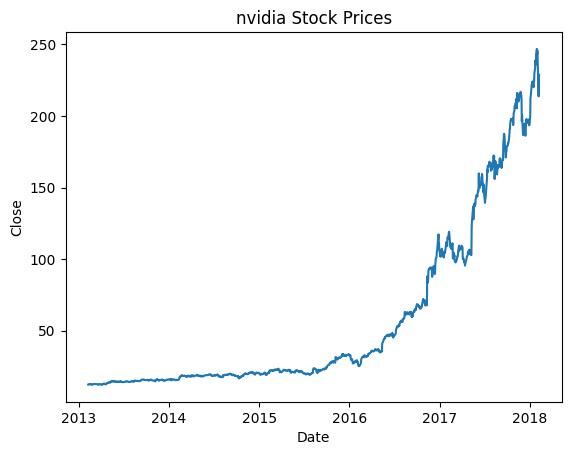

In [55]:


plt.plot(nvidia['date'],nvidia['close']) 
plt.xlabel("Date") 
plt.ylabel("Close") 
plt.title("nvidia Stock Prices") 
plt.show()

splitting test train for nvidia

In [56]:

close_data = nvidia.filter(['close']) 
dataset = close_data.values 
training = int(np.ceil(len(dataset) * .95)) 
print(training) 

1197


In [57]:

from sklearn.preprocessing import MinMaxScaler 
  
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 
  
train_data = scaled_data[0:int(training), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 
  
for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 
  
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [63]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=64, 
                            return_sequences=True, 
                            input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=64)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.2)) 
model.add(keras.layers.Dense(1)) 
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [64]:

model.compile(optimizer='adam', 
              loss='mean_squared_error') 
history = model.fit(x_train, 
                    y_train, 
                    epochs=10) 

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0116
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0013
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 8.2499e-04
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 9.6706e-04
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0014
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 9.4646e-04
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 6.7903e-04
Epoch 9/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0011
Epoch 10/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8.8198e-04


In [65]:

test_data = scaled_data[training - 60:, :] 
x_test = [] 
y_test = dataset[training:, :] 
for i in range(60, len(test_data)): 
    x_test.append(test_data[i-60:i, 0]) 
  
x_test = np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 
  
# predict the testing data 
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) 
  
# evaluation metrics 
var = np.mean(((predictions - y_test) ** 2)) 
print("var:", var) 
print("std dev:", np.sqrt(var)) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step
var: 117.53408932406745
std dev: 10.841314003572974


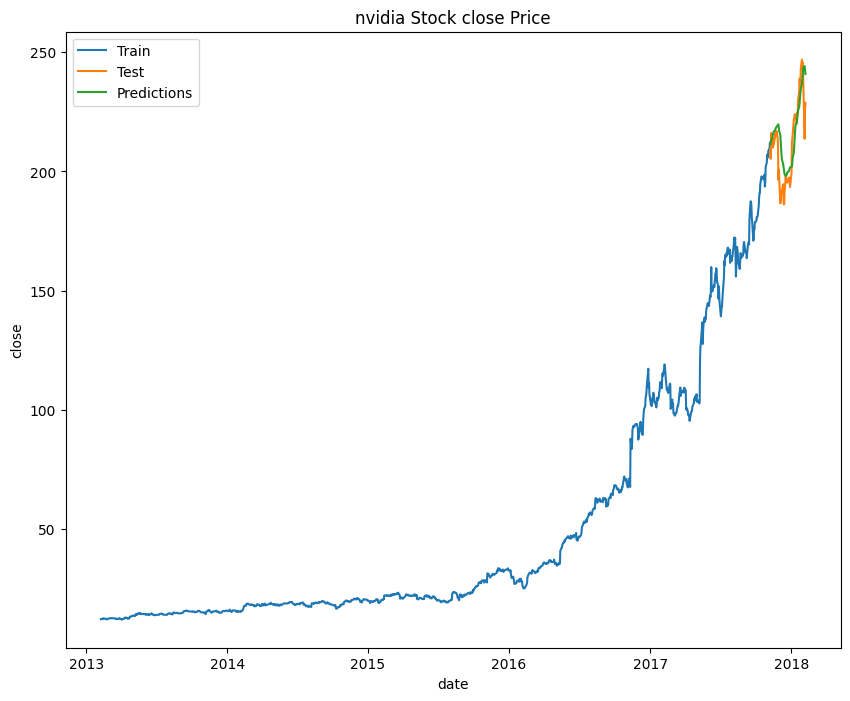

In [66]:

train = nvidia[:training] 
test = nvidia[training:] 
test['Predictions'] = predictions 
  
plt.figure(figsize=(10, 8)) 
plt.plot(train['date'], train['close']) 
plt.plot(test['date'], test[['close', 'Predictions']]) 
plt.title('nvidia Stock close Price') 
plt.xlabel('date') 
plt.ylabel("close") 
plt.legend(['Train', 'Test', 'Predictions']) 